<a href="https://colab.research.google.com/github/Sairithvik01/NLP/blob/main/Python_Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Processing /content/youtubecommentsgeneral.csv ---
Preprocessing text data...
Total samples: 5000
Training samples: 4000
Testing samples: 1000
Vectorizing text using TF-IDF...
Training LinearSVC model...
Evaluating model...

--- Model Accuracy for /content/youtubecommentsgeneral.csv ---
Accuracy: 83.80%

--- Classification Report for /content/youtubecommentsgeneral.csv ---
              precision    recall  f1-score   support

    negative       0.84      0.81      0.83       340
     neutral       0.82      0.86      0.84       322
    positive       0.86      0.84      0.85       338

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

Generating confusion matrix plot for /content/youtubecommentsgeneral.csv...
Generated 'confusion_matrix_youtubecommentsgeneral.png'.


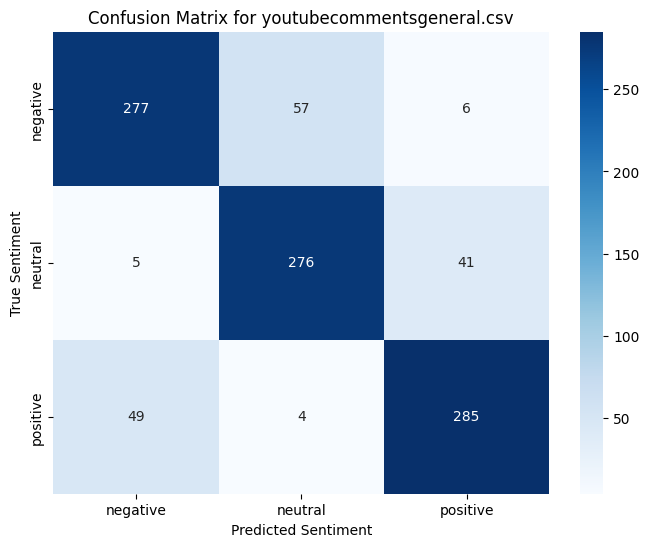


--- Processing /content/youtubecommentsproduct.csv ---
Preprocessing text data...
Total samples: 5000
Training samples: 4000
Testing samples: 1000
Vectorizing text using TF-IDF...
Training LinearSVC model...
Evaluating model...

--- Model Accuracy for /content/youtubecommentsproduct.csv ---
Accuracy: 83.80%

--- Classification Report for /content/youtubecommentsproduct.csv ---
              precision    recall  f1-score   support

    negative       0.84      0.81      0.83       343
     neutral       0.82      0.85      0.84       328
    positive       0.85      0.85      0.85       329

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

Generating confusion matrix plot for /content/youtubecommentsproduct.csv...
Generated 'confusion_matrix_youtubecommentsproduct.png'.


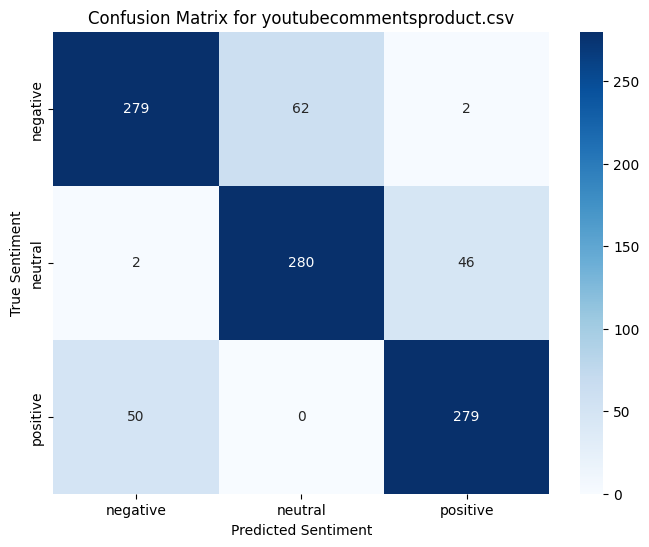


--- Processing /content/YoutubeCommentsDataSet.csv ---
Preprocessing text data...
Total samples: 18364
Training samples: 14691
Testing samples: 3673
Vectorizing text using TF-IDF...
Training LinearSVC model...
Evaluating model...

--- Model Accuracy for /content/YoutubeCommentsDataSet.csv ---
Accuracy: 75.14%

--- Classification Report for /content/YoutubeCommentsDataSet.csv ---
              precision    recall  f1-score   support

    negative       0.55      0.54      0.54       467
     neutral       0.59      0.62      0.61       925
    positive       0.86      0.85      0.85      2281

    accuracy                           0.75      3673
   macro avg       0.67      0.67      0.67      3673
weighted avg       0.75      0.75      0.75      3673

Generating confusion matrix plot for /content/YoutubeCommentsDataSet.csv...
Generated 'confusion_matrix_YoutubeCommentsDataSet.png'.


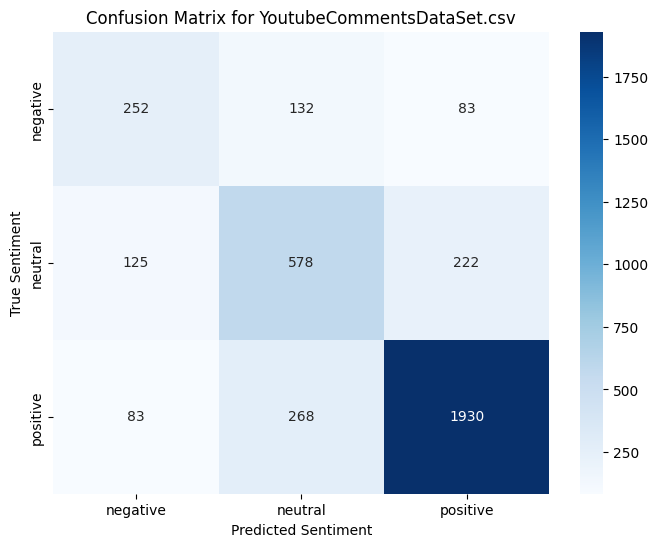

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import os # Import the os module for path manipulation

# --- NLTK Download ---
try:
    nltk.download('punkt', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)
    nltk.download('punkt_tab', quiet=True)
except Exception as e:
    print(f"Could not download NLTK data. Error: {e}")
    print("Please ensure you have an internet connection for the first run.")

# Manual list of common English stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'itself', 'they', 'them', 'their', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now',
    'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn',
    'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn',
    'weren', 'won', 'wouldn'
])

def get_wordnet_pos(tag):
    """Map POS tag to first character lemmatize() accepts"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Cleans, tokenizes, and lemmatizes a single text string."""
    text = str(text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()

    lemmatized_words = []
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    for word, tag in pos_tags:
        if word not in stop_words and len(word) > 1:
            wn_tag = get_wordnet_pos(tag)
            lemmatized_words.append(lemmatizer.lemmatize(word, pos=wn_tag))

    return ' '.join(lemmatized_words)

# List of dataset files
dataset_files = ['/content/youtubecommentsgeneral.csv', '/content/youtubecommentsproduct.csv', '/content/YoutubeCommentsDataSet.csv']

for file_path in dataset_files:
    print(f"\n--- Processing {file_path} ---")
    try:
        # 1. Load and Prepare Data
        df = pd.read_csv(file_path)

        # Determine the comment and sentiment column names based on the file
        if 'comment_text' in df.columns and 'sentiment' in df.columns:
            comment_col = 'comment_text'
            sentiment_col = 'sentiment'
        elif 'Comment' in df.columns and 'Sentiment' in df.columns:
            comment_col = 'Comment'
            sentiment_col = 'Sentiment'
        else:
            print(f"Error: Could not find comment and sentiment columns in {file_path}. Skipping.")
            continue

        df.dropna(subset=[comment_col, sentiment_col], inplace=True)

        print("Preprocessing text data...")
        df['Cleaned_Comment'] = df[comment_col].apply(preprocess_text)

        X = df['Cleaned_Comment']
        y = df[sentiment_col]

        # 2. Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        print(f"Total samples: {len(df)}")
        print(f"Training samples: {len(X_train)}")
        print(f"Testing samples: {len(X_test)}")

        # 3. Feature Engineering (TF-IDF)
        print("Vectorizing text using TF-IDF...")
        tfidf_vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1, 2), min_df=3)
        X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
        X_test_tfidf = tfidf_vectorizer.transform(X_test)

        # 4. Model Training
        print("Training LinearSVC model...")
        model = LinearSVC(C=0.8, max_iter=2000, random_state=42, class_weight='balanced')
        model.fit(X_train_tfidf, y_train)

        # 5. Model Evaluation
        print("Evaluating model...")
        y_pred = model.predict(X_test_tfidf)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n--- Model Accuracy for {file_path} ---")
        print(f"Accuracy: {accuracy * 100:.2f}%")

        print(f"\n--- Classification Report for {file_path} ---")
        report = classification_report(y_test, y_pred, zero_division=0)
        print(report)

        # 6. Confusion Matrix Visualization
        print(f"Generating confusion matrix plot for {file_path}...")
        cm = confusion_matrix(y_test, y_pred)
        class_names = model.classes_

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f'Confusion Matrix for {os.path.basename(file_path)}') # Use basename for plot title
        plt.ylabel('True Sentiment')
        plt.xlabel('Predicted Sentiment')

        # Save the plot with a file name that includes the dataset name
        plot_filename = f'confusion_matrix_{os.path.basename(file_path).replace(".csv", ".png")}'
        plt.savefig(plot_filename)
        print(f"Generated '{plot_filename}'.")
        plt.show() # Display the plot for the current file

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please ensure the CSV files exist at the specified paths.")
    except Exception as e:
        print(f"An error occurred while processing {file_path}: {e}")

Training Support Vector Machine (SVM) model...
Evaluating SVM model...

--- SVM Model Accuracy ---
Accuracy: 72.94%

--- SVM Classification Report ---
              precision    recall  f1-score   support

    negative       0.47      0.61      0.53       467
     neutral       0.56      0.68      0.61       925
    positive       0.91      0.77      0.84      2281

    accuracy                           0.73      3673
   macro avg       0.65      0.69      0.66      3673
weighted avg       0.77      0.73      0.74      3673

Generating SVM confusion matrix plot...
Generated 'confusion_matrix_svm.png'.


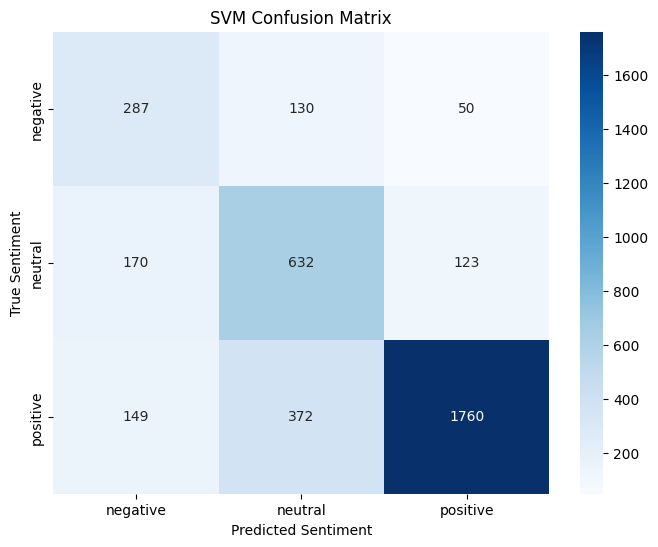

In [5]:
from sklearn.svm import SVC

# --- 4. Model Training (SVM) ---
print("Training Support Vector Machine (SVM) model...")
# Initialize and train the SVM model
# Using a linear kernel for text classification, similar to Logistic Regression
# Added class_weight='balanced' to handle potential class imbalance
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')

# Train the model on the TF-IDF transformed training data
svm_model.fit(X_train_tfidf, y_train)

# --- 5. Model Evaluation (SVM) ---
print("Evaluating SVM model...")
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n--- SVM Model Accuracy ---")
print(f"Accuracy: {accuracy_svm * 100:.2f}%")

# Print classification report (precision, recall, f1-score)
print("\n--- SVM Classification Report ---")
report_svm = classification_report(y_test, y_pred_svm, zero_division=0)
print(report_svm)

# --- 6. Confusion Matrix Visualization (SVM) ---
print("Generating SVM confusion matrix plot...")
# Generate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
class_names = svm_model.classes_

# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('SVM Confusion Matrix')
plt.ylabel('True Sentiment')
plt.xlabel('Predicted Sentiment')

# Save the plot as an image file
plt.savefig('confusion_matrix_svm.png')
print("Generated 'confusion_matrix_svm.png'.")